<a href="https://colab.research.google.com/github/guilhermelaviola/SoccerCompetitionsStudy/blob/main/UEFAEuroStudy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing all the necessary libraries:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style = 'whitegrid')
plt.style.use('seaborn-pastel')

<ipython-input-1-de0a920cb73a>:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-pastel')


In [2]:
# Importing the dataset:
nt_tournaments = pd.ExcelFile('nt-tournaments-finals.xlsx')
ue = pd.read_excel(nt_tournaments, 'UEFA Euro finals')

# Displaying the last 5 champions:
ue.tail()

,Year,Winners,Score,Runners-up,Venue,Host city,Host country,Attendance,How the match was won,Unnamed: 9
13,2008,Spain,1–0,Germany,Ernst-Happel-Stadion,Vienna,Austria,51428,Regular time,NaN
14,2012,Spain,4–0,Italy,Olimpiyskiy National Sports Complex,Kyiv,Ukraine,63170,Regular time,NaN
15,2016,Portugal,1–0,France,Stade de France,Saint-Denis,France,75868,Extra time,NaN
16,2020,Italy,1–1,England,Wembley Stadium,London,England,67173,Extra time and Penalty shootout,
17,2024,Spain,2–1,England,Olympiastadion,Berlin,Germany,65600,Regular time,NaN


In [3]:
# Displaying the number of rows and columns in the dataset:
ue.shape

(18, 10)

In [4]:
# Displaying the datatypes presented in the columns:
ue.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Year                   18 non-null     int64 
 1   Winners                18 non-null     object
 2   Score                  18 non-null     object
 3   Runners-up             18 non-null     object
 4   Venue                  18 non-null     object
 5   Host city              18 non-null     object
 6   Host country           18 non-null     object
 7   Attendance             18 non-null     int64 
 8   How the match was won  18 non-null     object
 9   Unnamed: 9             1 non-null      object
dtypes: int64(2), object(8)
memory usage: 1.5+ KB


In [5]:
# Displaying general statistical information of the number data present in the dataset:
ue.describe()

,Year,Attendance
count,18.000000,18.000000
mean,1990.666667,54341.833333
std,20.396078,17197.686111
min,1960.000000,17966.000000
25%,1973.000000,44141.500000
50%,1990.000000,57099.000000
75%,2007.000000,66779.750000
max,2024.000000,79115.000000


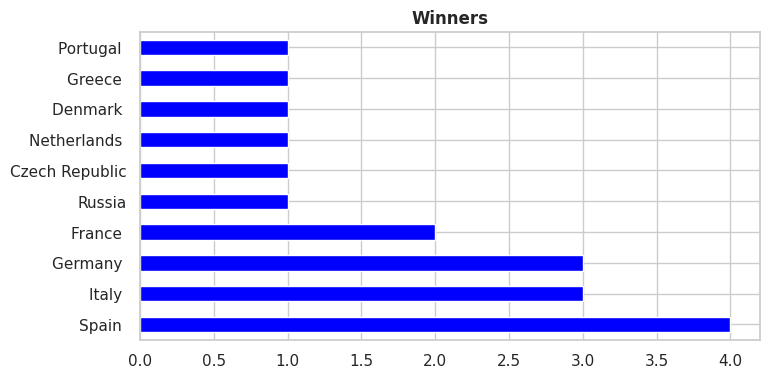

In [7]:
# Displaying the number of titles by nation:
ue['Winners'].value_counts().plot(kind = 'barh', color = 'blue', figsize = (8, 4))
plt.ylabel(None)
plt.title('Winners', fontweight = 'bold')
plt.show()

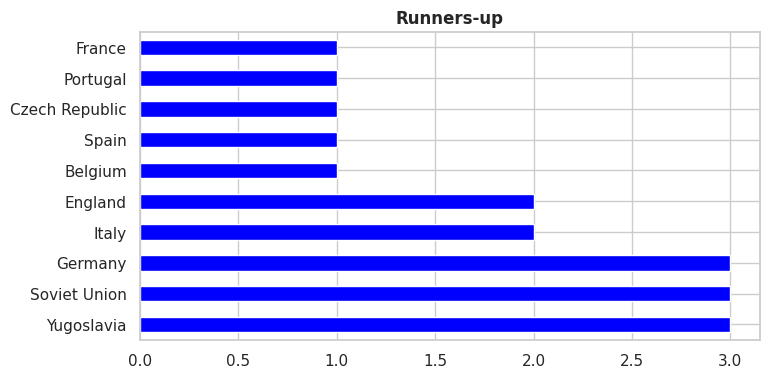

In [8]:
# Displaying the number of runners-up by nation:
ue['Runners-up'].value_counts().plot(kind = 'barh', color = 'blue', figsize = (8, 4))
plt.ylabel(None)
plt.title('Runners-up', fontweight = 'bold')
plt.show()

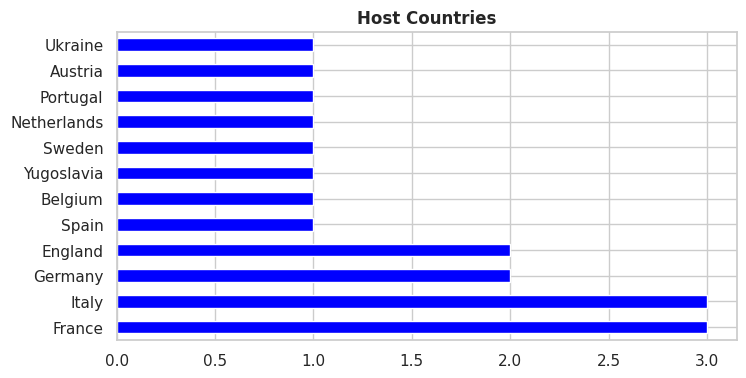

In [9]:
# Displaying the host countries by nation:
ue['Host country'].value_counts().plot(kind = 'barh', color = 'blue', figsize = (8, 4))
plt.ylabel(None)
plt.title('Host Countries', fontweight = 'bold')
plt.show()

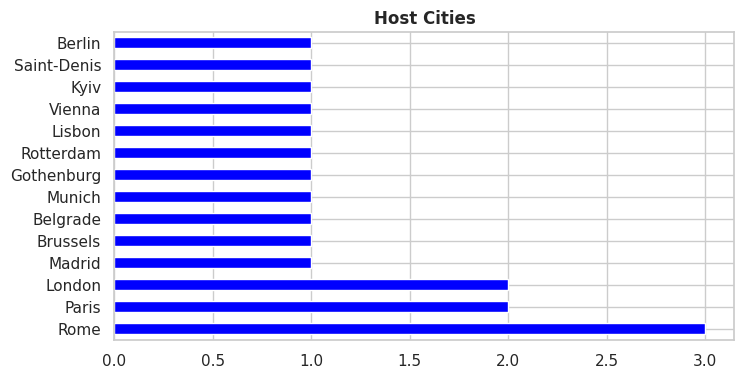

In [11]:
# Displaying the cities that hosted finals:
ue['Host city'].value_counts().plot(kind = 'barh', color = 'blue', figsize = (8, 4))
plt.ylabel(None)
plt.title('Host Cities', fontweight = 'bold')
plt.show()

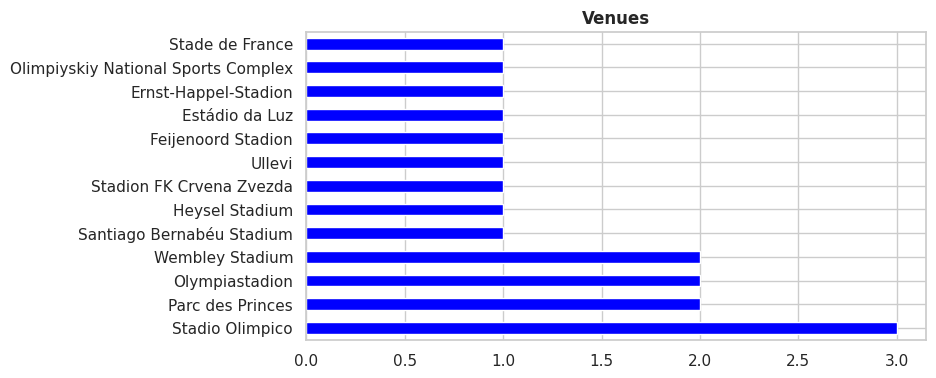

In [12]:
# Displaying the venues that hosted finals:
ue['Venue'].value_counts().plot(kind = 'barh', color = 'blue', figsize = (8, 4))
plt.ylabel(None)
plt.title('Venues', fontweight = 'bold')
plt.show()

In [13]:
# Checking if the club won UEFA Euro at home or away:
def champion_at_home(row):
  winners_country = row['Winners']
  host_country = row['Host country']
  if winners_country == host_country:
    result = 'Home'
  else:
    result = 'Away'
  return result

# Applying the function above on a column of the dataset and generating a new column as result:
ue['Home champion?'] = ue.apply(champion_at_home, axis=1)
ue.head()

,Year,Winners,Score,Runners-up,Venue,Host city,Host country,Attendance,How the match was won,Unnamed: 9,Home champion?
0,1960,Russia,2–1,Yugoslavia,Parc des Princes,Paris,France,17966,Extra time,NaN,Away
1,1964,Spain,2–1,Soviet Union,Santiago Bernabéu Stadium,Madrid,Spain,79115,Regular time,NaN,Away
2,1968,Italy,1–1,Yugoslavia,Stadio Olimpico,Rome,Italy,68817,Replayed match,NaN,Away
3,1968,Italy,2–0,Yugoslavia,Stadio Olimpico,Rome,Italy,32886,Replayed match,NaN,Away
4,1972,Germany,3–0,Soviet Union,Heysel Stadium,Brussels,Belgium,43066,Regular time,NaN,Away


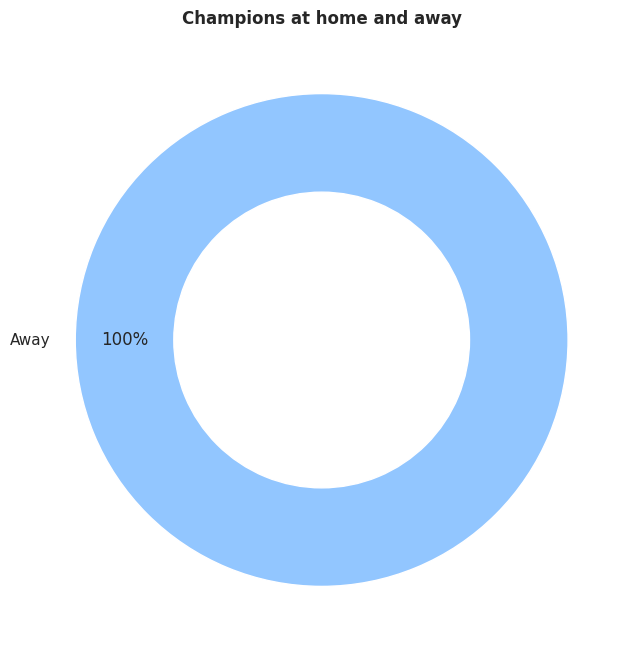

In [14]:
# Displaying the clubs who were champions at home and away:
ue['Home champion?'].value_counts().plot(kind = 'pie', autopct = '%.0f%%', figsize = (8, 8), wedgeprops = dict(width = 0.4), pctdistance = 0.8)
plt.ylabel(None)
plt.title('Champions at home and away', fontweight = 'bold')
plt.show()

In [15]:
# Checking if the club was UEFA Euro runner-up at home or away:
def runner_up_at_home(row):
  runners_up_country = row['Runners-up']
  host_country = row['Host country']
  if runners_up_country == host_country:
    result = 'Home'
  else:
    result = 'Away'
  return result

# Applying the function above on a column of the dataset and generating a new column as result:
ue['Home runners-up?'] = ue.apply(runner_up_at_home, axis=1)
ue.head()

,Year,Winners,Score,Runners-up,Venue,Host city,Host country,Attendance,How the match was won,Unnamed: 9,Home champion?,Home runners-up?
0,1960,Russia,2–1,Yugoslavia,Parc des Princes,Paris,France,17966,Extra time,NaN,Away,Away
1,1964,Spain,2–1,Soviet Union,Santiago Bernabéu Stadium,Madrid,Spain,79115,Regular time,NaN,Away,Away
2,1968,Italy,1–1,Yugoslavia,Stadio Olimpico,Rome,Italy,68817,Replayed match,NaN,Away,Away
3,1968,Italy,2–0,Yugoslavia,Stadio Olimpico,Rome,Italy,32886,Replayed match,NaN,Away,Away
4,1972,Germany,3–0,Soviet Union,Heysel Stadium,Brussels,Belgium,43066,Regular time,NaN,Away,Away


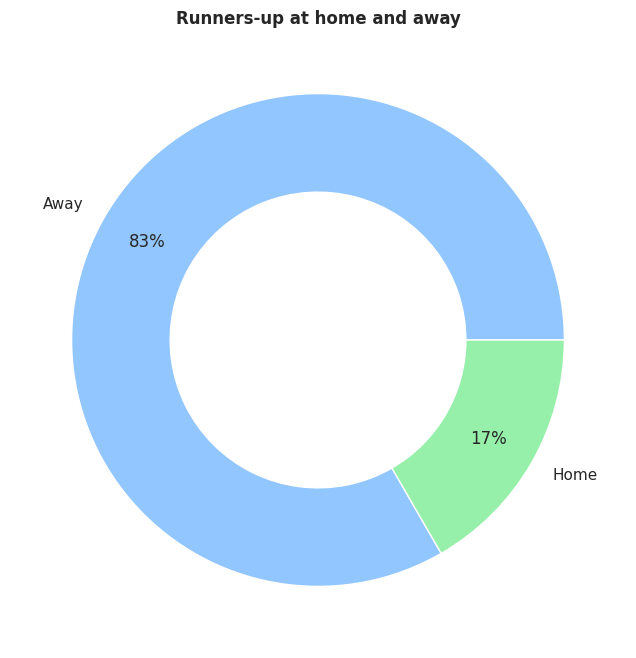

In [16]:
# Displaying the clubs who were runners-up at home and away:
ue['Home runners-up?'].value_counts().plot(kind = 'pie', autopct = '%.0f%%', figsize = (8, 8), wedgeprops = dict(width = 0.4), pctdistance = 0.8)
plt.ylabel(None)
plt.title('Runners-up at home and away', fontweight = 'bold')
plt.show()

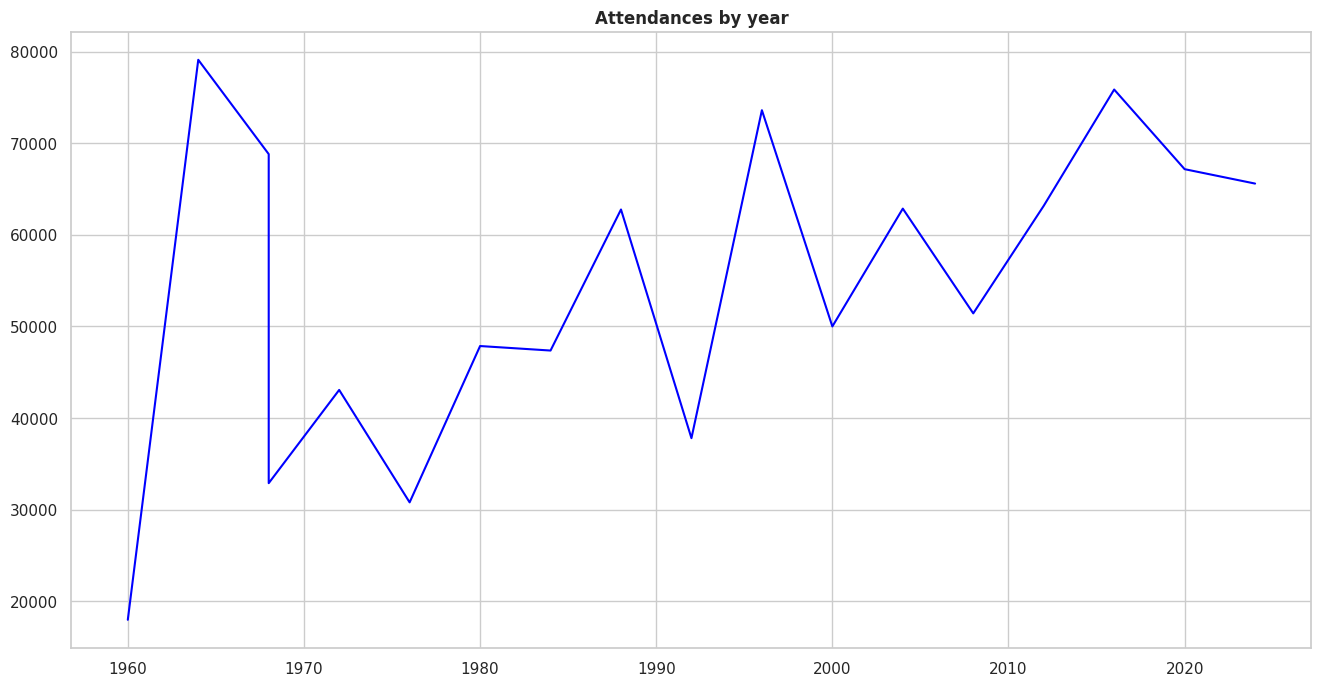

In [17]:
# Displaying the attendances by year:
plt.figure(figsize = (16, 8))
plt.plot(ue['Year'], ue['Attendance'], color = 'blue')
plt.title('Attendances by year', fontweight = 'bold')
plt.show()

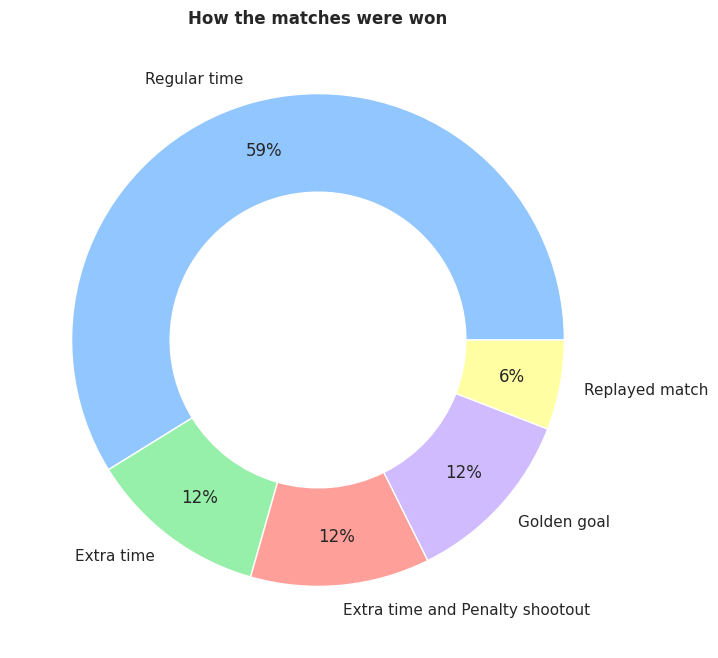

In [18]:
# Displaying the distribution of the way the match was won:
ue.groupby('Year').first()['How the match was won'].value_counts().plot(kind = 'pie', autopct = '%.0f%%', figsize = (8, 8), wedgeprops = dict(width = 0.4), pctdistance = 0.8)
plt.ylabel(None)
plt.title('How the matches were won', fontweight = 'bold')
plt.show()